# Exploring recombination through simulations (solutions)
### by Jonathan Fischer

In [1]:
from datascience import *
import numpy as np
import random
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
#from client.api.notebook import Notebook

In [2]:
# Write a function that models the recombination of two chromosomes. 

# Get the length of the sequences and make sure they match
# Set the recombination rate
# Sample the number of recombination points
# Sample the recombination point coordinates
# Initialize the outputs
# Iterate through the coordinates and fill in the outputs

seq1 = 'A'*1000
seq2 = 'B'*1000

def recombine(seq1, seq2, r = 8):
    l1 = len(seq1)
    l2 = len(seq2)
    if l1 == l2:
        n_sites = np.random.poisson(lam = r*l1/1000) + 1
        sites = random.sample(list(np.arange(1, l1-1)), n_sites)
        sites = np.r_[0, np.sort(sites), l1-1]
        l_s = len(sites)
        out1 = ''
        out2 = ''
        for i in np.arange(0, l_s-1):
            if i % 2 == 0:
                out1 += seq1[sites[i]:sites[i+1]]
                out2 += seq2[sites[i]:sites[i+1]]
            elif i % 2 == 1:
                out1 += seq2[sites[i]:sites[i+1]]
                out2 += seq1[sites[i]:sites[i+1]]
        return(make_array(out1, out2))
    else:
        return("Sequence lengths don't match")
    
seq1 = 'A'*100 + 'B'*100
seq2 = 'A'*100 + 'A'*100
   
recombine(seq1, seq2)


array(['AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBB',
       'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'],
      dtype='<U199')

In [3]:
# Write a function named inherited_chroms which takes two arrays of two chromosomes as arguments and yields
# a pair of chromosomes that are obtained via recombination. Output should be an array of length two which
# contains the two chromosomes.

def inherited_chroms(parent1, parent2):
    p1 = recombine(parent1[0], parent1[1])
    p2 = recombine(parent2[0], parent2[1])
    
    to_inherit = random.choices([0,1], k = 2)
    child_seqs = make_array(p1[to_inherit[0]], p2[to_inherit[1]])
    return(child_seqs)

In [4]:
# Here's a function that plots "painted" chromosomes for two populations. Feel free to use this or make your own.
# The input is a length 2 array containing a pair of chromosome sequences.

def paint_chroms(chroms):
    l = len(chroms[0])
    color_1 = list()
    for i in chroms[0]:
        if i == '1':
            color_1.append('blue')
        elif i == '2':
            color_1.append('red')
    color_2 = list()
    for i in chroms[1]:
        if i == '1':
            color_2.append('blue')
        elif i == '2':
            color_2.append('red')
    plt.scatter(np.arange(l), [1]*l, color = color_1)
    plt.scatter(np.arange(l), [-1]*l, color = color_2)
    plt.ylim(-2, 2)
    plt.show()

In [5]:
# Here's a function that makes sequences for a set number of individuals and 2 populations. You can use
# mine or write your own. This function takes the number of individuals, identity of individuals which are 
# in population 2, and length of the sequence and returns a list of arrays containing each individual's
# chromosome pairs.

def seq_maker(n_individuals, pop_2_indices):
    pop_1 = '1' * 1000
    pop_2 = '2' * 1000
    ind_list = list()
    for i in np.arange(n_individuals):
        if i in pop_2_indices:
            ind_list.append(make_array(pop_2, pop_2))
        else:
            ind_list.append(make_array(pop_1, pop_1))
    return(ind_list)


In [6]:
# Write a function that models recombination from grandparents. The input should be a list of length-2 arrays,
# each of which contains a pair of chromosomes.

def grandparents_recomb(gp_list):
    parent_1 = inherited_chroms(gp_list[0], gp_list[1])
    parent_2 = inherited_chroms(gp_list[2], gp_list[3])
    child = inherited_chroms(parent_1, parent_2)
    return(child)

In [7]:
# Model recombination from great-grandparents. Inputs are two lists of chromosomes from grandparents.

def greatgrandparents_recomb(gp_list_1, gp_list_2):
    c_1 = grandparents_recomb(gp_list_1)
    c_2 = grandparents_recomb(gp_list_2)
    gc_1 = inherited_chroms(c_1, c_2)
    return(gc_1)

In [8]:
# Generate sequences for grandparents and great-grandparents
gp_list = seq_maker(4, [0])
gp_list_1 = seq_maker(4, [0])
gp_list_2 = seq_maker(4, [])

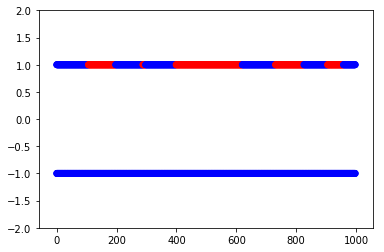

In [9]:
# Example of the grandchild's chromosomes
gc_1 = grandparents_recomb(gp_list)
paint_chroms(gc_1)

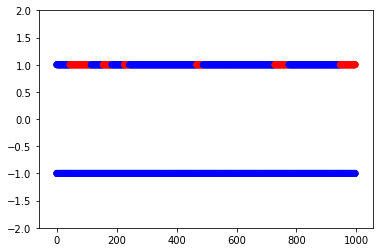

In [10]:
# Example of the great-grandchild's chromosomes
ggc_1 = greatgrandparents_recomb(gp_list_1, gp_list_2)
paint_chroms(ggc_1)

## Optional

In [15]:
# Write a function to compute the average sequence from population 2 and the number of switches b/w populations
# in the chromosomes of one individual
def recomb_summary(chroms):
    ct = 0
    pts = 0
    for x in chroms:
        j = x[0]
        for i in x:
            ct += (i == '2')
            pts += (i != j)
            j = i
    return([.5*ct/len(chroms[0]), pts])

In [16]:
# Make sure the ancestry proportions are the same but occur at different generations.
gp_list = seq_maker(4, [0])
gp_list_1 = seq_maker(4, [0,2])
gp_list_2 = seq_maker(4, [])

summary_mat = np.zeros((1000,4))
for i in np.arange(1000):
    r_gp = recomb_summary(grandparents_recomb(gp_list))
    r_ggp = recomb_summary(greatgrandparents_recomb(gp_list_1, gp_list_2))
    summary_mat[i, 0] = r_gp[0]
    summary_mat[i, 1] = r_ggp[0]
    summary_mat[i, 2] = r_gp[1]
    summary_mat[i, 3] = r_ggp[1]

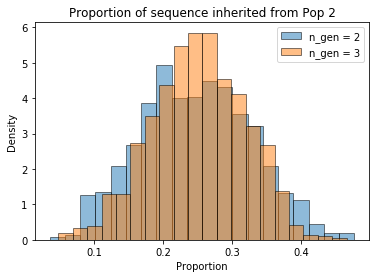

In [17]:
# Plot how much ancestry is inherited from Pop 2 for the two settings (admixture at grandparents or great-grandparents)
plt.hist(summary_mat[:,0], alpha = 0.5, density = True, bins = 20)
plt.hist(summary_mat[:,1], alpha = 0.5, density = True, bins = 20)
plt.legend(['n_gen = 2', 'n_gen = 3'])
plt.xlabel('Proportion')
plt.ylabel('Density')
plt.title('Proportion of sequence inherited from Pop 2')
plt.show()

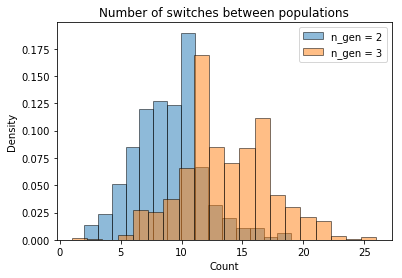

In [19]:
# Plot number of switches between populations for the two settings (admixture at grandparents or great-grandparents)
plt.hist(summary_mat[:,2], alpha = 0.5, density = True, bins = 15)
plt.hist(summary_mat[:,3], alpha = 0.5, density = True, bins = 20)
plt.legend(['n_gen = 2', 'n_gen = 3'])
plt.xlabel('Count')
plt.ylabel('Density')
plt.title('Number of switches between populations')
plt.show()